## data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
train = pd.read_csv('../data/p2p/Train.csv',encoding='latin-1')
test = pd.read_csv('../data/p2p/Test.csv')

In [3]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [4]:
train.shape, test.shape

((87020, 26), (37717, 24))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [6]:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

## 数据处理

In [7]:
data.apply(lambda x: sum(x.isnull()))

City                      1401
DOB                          0
Device_Type                  0
Disbursed                37717
EMI_Loan_Submitted       84901
Employer_Name              113
Existing_EMI               111
Filled_Form                  0
Gender                       0
ID                           0
Interest_Rate            84901
Lead_Creation_Date           0
Loan_Amount_Applied        111
Loan_Amount_Submitted    49535
Loan_Tenure_Applied        111
Loan_Tenure_Submitted    49535
LoggedIn                 37717
Mobile_Verified              0
Monthly_Income               0
Processing_Fee           85346
Salary_Account           16801
Source                       0
Var1                         0
Var2                         0
Var4                         0
Var5                         0
source                       0
dtype: int64

### 类别变量

In [8]:
var = ['Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
for v in var:
    print('\nFrequency count for variable %s'%v)
    print(data[v].value_counts())


Frequency count for variable Gender
Male      71398
Female    53339
Name: Gender, dtype: int64

Frequency count for variable Salary_Account
HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Bank of India                                 1330
Yes Bank                                            1120
ING Vysya                                            996
Corp

City

In [9]:
len(data['City'].unique())

724

In [10]:
data.drop('City',axis=1,inplace=True)

Age

In [11]:
data['DOB'].head()

0    23-May-78
1    07-Oct-85
2    10-Oct-81
3    30-Nov-87
4    17-Feb-84
Name: DOB, dtype: object

In [12]:
data['Age'] = data['DOB'].apply(lambda x: 115 - int(x[-2:])) #2015年
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [13]:
data.drop('DOB',axis=1,inplace=True)

EMI_Loan_Submitted

https://en.wikipedia.org/wiki/Equated_monthly_installment

In [14]:
sum(data['EMI_Loan_Submitted'].isnull())

84901

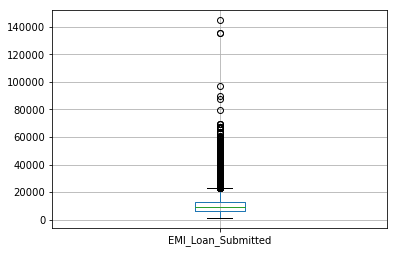

In [15]:
data.boxplot(column=['EMI_Loan_Submitted'],return_type='axes')

In [16]:

data['EMI_Loan_Submitted_Missing'] = data['EMI_Loan_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['EMI_Loan_Submitted','EMI_Loan_Submitted_Missing']].head(10)

,EMI_Loan_Submitted,EMI_Loan_Submitted_Missing
0,NaN,1
1,6762.90,0
2,NaN,1
3,NaN,1
4,NaN,1
5,6978.92,0
6,NaN,1
7,NaN,1
8,30824.65,0
9,10883.38,0


In [17]:
data.drop('EMI_Loan_Submitted',axis=1,inplace=True)

Name

In [18]:
len(data['Employer_Name'].value_counts())

57194

In [19]:
data.drop('Employer_Name',axis=1,inplace=True)

Existing EMI

In [20]:
data['Existing_EMI'].describe()

count    1.246260e+05
mean     3.636342e+03
std      3.369124e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

In [21]:
data['Existing_EMI'].isnull().sum()

111

In [22]:
data['Existing_EMI'].fillna(data['Existing_EMI'].median(), inplace=True)

In [23]:
data['Existing_EMI'].describe()

count    1.247370e+05
mean     3.633107e+03
std      3.367642e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.500000e+03
max      1.000000e+07
Name: Existing_EMI, dtype: float64

Interest Rate:

In [24]:
data['Interest_Rate'].isnull().sum()

84901

In [25]:
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x: 1 if pd.isnull(x) else 0)
data[['Interest_Rate','Interest_Rate_Missing']].head(10)

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
5,13.99,0
6,NaN,1
7,NaN,1
8,14.85,0
9,18.25,0


In [26]:
data.drop('Interest_Rate',axis=1,inplace=True)

Lead Creation Date:

In [27]:
# no use?
data.drop('Lead_Creation_Date',axis=1,inplace=True)

Loan Amount / Tenure applied:

In [28]:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace=True)

Loan Amount / Tenure selected

In [29]:
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [30]:
data.drop(['Loan_Amount_Submitted','Loan_Tenure_Submitted'],axis=1,inplace=True)

logged-in?

In [31]:
data.drop('LoggedIn',axis=1,inplace=True)

salary account?

In [32]:
data.drop('Salary_Account',axis=1,inplace=True)

Processing_Fee

In [33]:
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x: 1 if pd.isnull(x) else 0)
data.drop('Processing_Fee',axis=1,inplace=True)

### Source

In [34]:
data['Source'].value_counts()

S122    55249
S133    42900
S159     7999
S143     6140
S127     2804
S137     2450
S134     1900
S161     1109
S151     1018
S157      929
S153      705
S144      447
S156      432
S158      294
S123      112
S141       83
S162       60
S124       43
S150       19
S160       11
S138        5
S155        5
S136        5
S129        4
S139        4
S135        2
S132        1
S142        1
S125        1
S130        1
S140        1
S126        1
S131        1
S154        1
Name: Source, dtype: int64

In [35]:
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

最终数据

In [36]:
data.apply(lambda x: sum(x.isnull()))

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [37]:
data.dtypes

Device_Type                       object
Disbursed                        float64
Existing_EMI                     float64
Filled_Form                       object
Gender                            object
ID                                object
Loan_Amount_Applied              float64
Loan_Tenure_Applied              float64
Mobile_Verified                   object
Monthly_Income                     int64
Source                            object
Var1                              object
Var2                              object
Var4                               int64
Var5                               int64
source                            object
Age                                int64
EMI_Loan_Submitted_Missing         int64
Interest_Rate_Missing              int64
Loan_Amount_Submitted_Missing      int64
Loan_Tenure_Submitted_Missing      int64
Processing_Fee_Missing             int64
dtype: object

LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

### One-Hot Coding

In [39]:
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Disbursed', 'Existing_EMI', 'ID', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Monthly_Income', 'Var4', 'Var5', 'source',
       'Age', 'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Processing_Fee_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

恢复数据

In [40]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [41]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

C:\Anaconda\envs\PY35\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\envs\PY35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [42]:
train.to_csv('../data/p2p/train_modified.csv',index=False)
test.to_csv('../data/p2p/test_modified.csv',index=False)

## Gradient Boosting模型

不像bagging算法只能改善模型高方差（high variance）情况，Boosting算法对同时控制偏差（bias）和方差都有非常好的效果，而且更加高效。如果你需要同时处理模型中的方差和偏差

Boosting可以将一系列弱学习因子（weak learners）相结合来提升总体模型的预测准确度。在任意时间t，根据t-1时刻得到的结果我们给当前结果赋予一个权重。之前正确预测的结果获得较小权重，错误分类的结果得到较大权重。回归问题的处理方法也是相似的。

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


+ 树参数：调节模型中每个决策树的性质
+ Boosting参数：调节模型中boosting的操作
+ 其他模型参数：调节模型总体的各项运作


**树相关参数**

1. min_samples_split
    + 定义了树中一个节点所需要用来分裂的最少样本数
    + 可以避免过度拟合(over-fitting)。如果用于分类的样本数太小，模型可能只适用于用来训练的样本的分类，而用较多的样本数则可以避免这个问题
    + 但是如果设定的值过大，就可能出现欠拟合现象(under-fitting)。因此我们可以用CV值考量调节效果
2. min_samples_leaf
    + 定义了树中终点节点所需要的最少的样本数
    + 同样，它也可以用来防止过度拟合
    + 在不均等分类问题中(imbalanced class problems)，一般这个参数需要被设定为较小的值，因为大部分少数类别（minority class）含有的样本都比较小
3. min_weight_fraction_leaf
    + 和上面min_samples_leaf很像，不同的是这里需要的是一个比例而不是绝对数值：终点节点所需的样本数占总样本数的比值
    + 2和3只需要定义一个就行了
4. max_depth
    + 定义了树的最大深度
    + 它也可以控制过度拟合，因为分类树越深就越可能过度拟合
    + 当然也应该用CV值检验
5. max_leaf_nodes
    + 定义了决定树里最多能有多少个终点节点
    + 这个属性有可能在上面max_depth里就被定义了。比如深度为n的二叉树就有最多2^n个终点节点
    + 如果我们定义了max_leaf_nodes，GBM就会忽略前面的max_depth
6. max_features
    + 决定了用于分类的特征数，是人为随机定义的
    + 根据经验一般选择总特征数的平方根就可以工作得很好了，但还是应该用不同的值尝试，最多可以尝试总特征数的30%-40%
    + 过多的分类特征可能也会导致过度拟合

GBM 方法的思路

1. 初始分类目标的参数值
2. 对所有的分类树进行迭代：
    + 根据前一轮分类树的结果更新分类目标的权重值（被错误分类的有更高的权重）
    + 用训练的子样本建模
    + 用所得模型对所有的样本进行预测
    + 再次根据分类结果更新权重值
3. 返回最终结果

Boosting 相关参数

1. learning_rate
    + 这个参数决定着每一个决策树对于最终结果（步骤2.4）的影响。GBM设定了初始的权重值之后，每一次树分类都会更新这个值，而learning_rate控制着每次更新的幅度
    + 一般来说这个值不应该设的比较大，因为较小的learning rate使得模型对不同的树更加稳健，就能更好地综合它们的结果
2. n_estimators
    + 定义了需要使用到的决策树的数量（步骤2）
    + 虽然GBM即使在有较多决策树时仍然能保持稳健，但还是可能发生过度拟合。所以也需要针对learning rate用CV值检验。subsample
    训练每个决定树所用到的子样本占总样本的比例，而对于子样本的选择是随机的。用稍小于1的值能够使模型更稳健，因为这样减少了方差。
    一把来说用~0.8就行了，更好的结果可以用调参获得。

第三类参数它们能影响到模型的总体功能：

1. loss
    + 指的是每一次节点分裂所要最小化的损失函数(loss function)
    + 对于分类和回归模型可以有不同的值。一般来说不用更改，用默认值就可以了，除非你对它及它对模型的影响很清楚。
2. init
    + 它影响了输出参数的起始化过程
    + 如果我们有一个模型，它的输出结果会用来作为GBM模型的起始估计，这个时候就可以用init 
3. random_state
    + 作为每次产生随机数的随机种子
    + 使用随机种子对于调参过程是很重要的，因为如果我们每次都用不同的随机种子，即使参数值没变每次出来的结果也会不同，这样不利于比较不同模型的结果
    + 任一个随即样本都有可能导致过度拟合，可以用不同的随机样本建模来减少过度拟合的可能，但这样计算上也会昂贵很多，因而我们很少这样用
4. verbose
    + 决定建模完成后对输出的打印方式：
        + 0：不输出任何结果（默认）
        + 1：打印特定区域的树的输出结果
        + 大于1：打印所有结果
5. warm_start
    + 这个参数的效果很有趣，有效地使用它可以省很多事
    + 使用它我们就可以用一个建好的模型来训练额外的决定树，能节省大量的时间，对于高阶应用我们应该多多探索这个选项。 
6. presort
    + 决定是否对数据进行预排序，可以使得树分裂地更快。
    + 默认情况下是自动选择的，当然你可以对其更改


In [46]:
train = pd.read_csv('../data/p2p/train_modified.csv')

In [47]:
target='Disbursed'
IDcol = 'ID'

In [50]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % 
              (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9856
AUC Score (Train): 0.862264
CV Score : Mean - 0.8318589 | Std - 0.008756969 | Min - 0.820805 | Max - 0.8438558


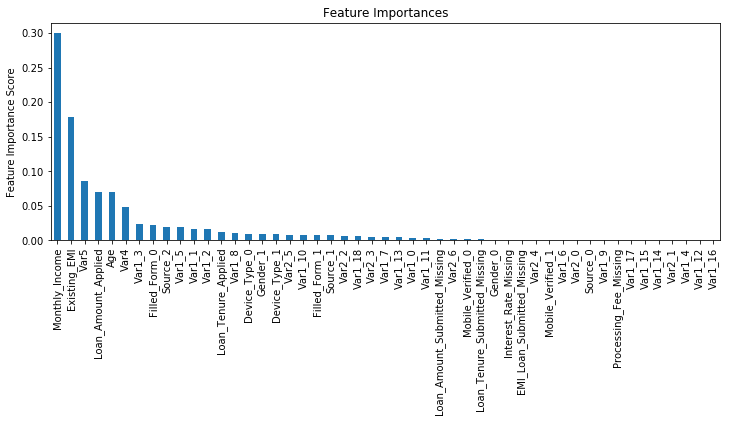

In [51]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, test, predictors)

**参数调节方法**

1. 选择一个相对来说稍微高一点的learning rate。一般默认的值是0.1，不过针对不同的问题，0.05到0.2之间都可以
2. 当前learning rate下最优的决策树数量，一般40-70
3. 接着调节树参数来调整learning rate和树的数量
4. 降低learning rate，同时会增加相应的决策树数量使得模型更加稳健

这里我们先预设树参数
+ min_samples_split=500: 这个值应该在总样本数的0.5-1%之间，由于我们研究的是不均等分类问题，我们可以取这个区间里一个比较小的数，500
+ min_samples_leaf=50: 可以凭感觉选一个合适的数，只要不会造成过度拟合
+ max_depth=8: 根据观察数和自变量数，这个值应该在5-8之间
+ max_features=sqrt: 经验上一般都选择平方根。
+ subsample=0.8: 开始的时候一般就用0.8

下面我们来找最优的树数量

In [52]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([20, 30, 40, 50, 60, 70, 80])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [53]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda\envs\PY35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83337, std: 0.00991, params: {'n_estimators': 20},
  mean: 0.83697, std: 0.00994, params: {'n_estimators': 30},
  mean: 0.83832, std: 0.01050, params: {'n_estimators': 40},
  mean: 0.83867, std: 0.01081, params: {'n_estimators': 50},
  mean: 0.83939, std: 0.01077, params: {'n_estimators': 60},
  mean: 0.83891, std: 0.01044, params: {'n_estimators': 70},
  mean: 0.83807, std: 0.01093, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.83938802668613077)

这里在learning_rate为0.1时，60最佳

In [70]:
gsearch1.cv_results_

{'mean_fit_time': array([ 2.35872416,  3.35088582,  4.25256743,  5.15112901,  6.37729125,
         7.39935284,  8.21987014]),
 'mean_score_time': array([ 0.03120008,  0.03744006,  0.0436801 ,  0.05928016,  0.05928011,
         0.0850049 ,  0.10140581]),
 'mean_test_score': array([ 0.83337449,  0.83697031,  0.83832436,  0.83867433,  0.83938803,
         0.83891464,  0.83806909]),
 'mean_train_score': array([ 0.88219203,  0.88959112,  0.89534287,  0.90140879,  0.90649064,
         0.91084815,  0.9147638 ]),
 'param_n_estimators': masked_array(data = [20 30 40 50 60 70 80],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'n_estimators': 80}),
 'rank_test_score': array([7, 6, 4, 3, 1, 2, 5]),
 'split0_test_score': array([ 0.81912514,  0.82194546,  0.82289556,  0.82256628,  0.8238819 ,
        

接下来调节树参数，从max_depth和 num_samples_split开始

In [54]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15]), 'min_samples_split': array([ 200,  400,  600,  800, 1000])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [55]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Anaconda\envs\PY35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83297, std: 0.01226, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.83251, std: 0.01054, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.83386, std: 0.01415, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83379, std: 0.01169, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83339, std: 0.01266, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83365, std: 0.00787, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.83663, std: 0.00991, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.83480, std: 0.00828, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83786, std: 0.01067, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.83769, std: 0.01060, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.83581, std: 0.01003, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.83729, std: 0.00959, params: {'max_depth': 9, 'min_samples_split': 400},
  

max_depth:9 , min_samples_split:800

In [56]:
param_test3 = {'min_samples_split':np.arange(1000,2100,200), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': array([30, 40, 50, 60, 70]), 'min_samples_split': array([1000, 1200, 1400, 1600, 1800, 2000])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [57]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Anaconda\envs\PY35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83821, std: 0.01092, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83876, std: 0.01262, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83552, std: 0.01024, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83683, std: 0.01429, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83958, std: 0.01233, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83852, std: 0.01097, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83839, std: 0.00896, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83757, std: 0.01274, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83757, std: 0.01074, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.83779, std: 0.01199, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.83764, std: 0.01366, params: {'min_samples_leaf': 40, 'min_samples_spl


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.896453
CV Score : Mean - 0.8397598 | Std - 0.009936017 | Min - 0.8255474 | Max - 0.8527672


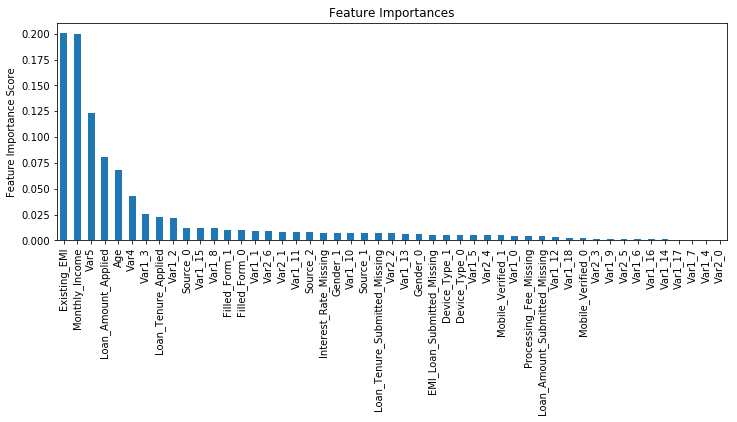

In [58]:
modelfit(gsearch3.best_estimator_, train, test, predictors)

比较之前的基线模型结果可以看出，现在我们的模型用了更多的特征，并且基线模型里少数特征的重要性评估值过高，分布偏斜明显，现在分布得更加均匀了。
接下来就剩下最后的树参数max_features了，

In [59]:
param_test4 = {'max_features':np.arange(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_features': array([ 7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [60]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Anaconda\envs\PY35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83976, std: 0.00994, params: {'max_features': 7},
  mean: 0.83648, std: 0.00988, params: {'max_features': 9},
  mean: 0.83919, std: 0.01042, params: {'max_features': 11},
  mean: 0.83738, std: 0.01017, params: {'max_features': 13},
  mean: 0.83898, std: 0.01101, params: {'max_features': 15},
  mean: 0.83437, std: 0.00965, params: {'max_features': 17},
  mean: 0.83524, std: 0.01018, params: {'max_features': 19}],
 {'max_features': 7},
 0.83975976288429499)

+ min_samples_split: 1200
+ min_samples_leaf: 60
+ max_depth: 9
+ max_features: 7

调整subsample和leraning rate

In [61]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, 
                            min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=7, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=60,
              min_samples_split=1200, min_weight_fraction_leaf=0.0,
              n_estimators=60, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [62]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\Anaconda\envs\PY35\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83645, std: 0.00942, params: {'subsample': 0.6},
  mean: 0.83685, std: 0.01242, params: {'subsample': 0.7},
  mean: 0.83601, std: 0.01074, params: {'subsample': 0.75},
  mean: 0.83976, std: 0.00994, params: {'subsample': 0.8},
  mean: 0.84086, std: 0.00997, params: {'subsample': 0.85},
  mean: 0.83828, std: 0.00984, params: {'subsample': 0.9}],
 {'subsample': 0.85},
 0.84085800832187396)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.897619
CV Score : Mean - 0.8391332 | Std - 0.009437997 | Min - 0.8271238 | Max - 0.8511221


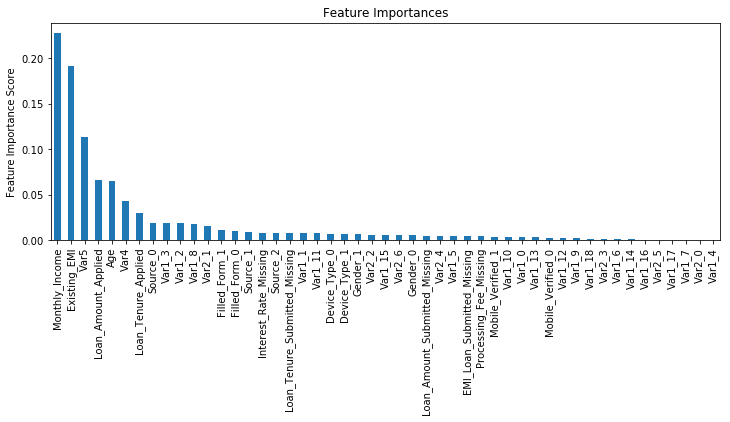

In [63]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, test, predictors)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.899962
CV Score : Mean - 0.8408728 | Std - 0.01020728 | Min - 0.8255379 | Max - 0.8526328


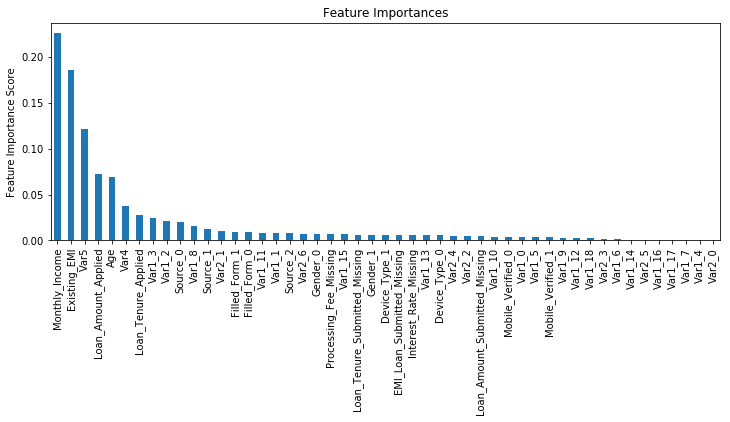

In [64]:
#进一步降低learning rate
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train, test, predictors)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.900738


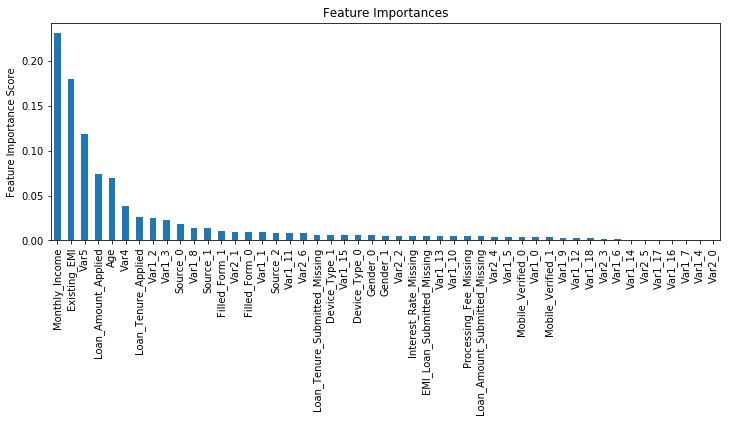

In [65]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
                                         warm_start=True)
modelfit(gbm_tuned_3, train, test, predictors, performCV=False)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.906449


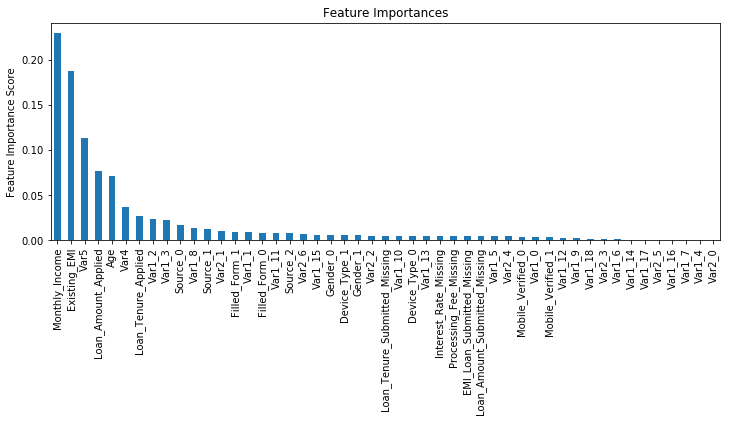

In [66]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, 
                                         min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
                                         warm_start=True)
modelfit(gbm_tuned_4, train, test, predictors, performCV=False)